# Create Time Series of Total Load in the WECC Based on the 2032 ADS


In [1]:
# Start by importing the packages we need:
import os
import datetime

import pandas as pd
import matplotlib.pyplot as plt


## Set the Directory Structure

In [3]:
# Identify the top-level directory and the subdirectory where the data will be stored:
load_data_dir =  '/Users/burl878/Documents/Code/code_repos/gdo_climate_toolsuite_visualizations/data/nerc_region_load_data/'
image_output_dir =  '/Users/burl878/Documents/Code/code_repos/gdo_climate_toolsuite_visualizations/plots/'


## Define a Function to Plot the 8760-hr Load Time Series for a Given Year


In [59]:
def plot_load_time_series(year: str, load_data_dir: str, image_output_dir: str, image_resolution: int, save_images=False):

    if year == 'ADS':
       # Read in the base WECC ADS values: 
       load_df = pd.read_csv((load_data_dir + 'WECC_ADS_Hourly_Loads_2018.csv'))
       year_string = '2018'
    else:
       # Read in the load data and subset to a given year:
       load_df = pd.read_csv((load_data_dir + 'WECC_Hourly_Loads_1980_to_2025.csv'))
       year_string = year 
    
    # Set 'Time_UTC	' to a datetime variable add in the year:
    load_df['Time_UTC'] = pd.to_datetime(load_df['Time_UTC'])
    load_df['Year'] = load_df['Time_UTC'].dt.year

    # Subset to just the data for the year you want to plot:
    subset_load_df = load_df[load_df['Year'] == int(year_string)].copy()
    subset_load_df.dropna(inplace=True)

    print(('Peak Load = ' + str((subset_load_df['WECC'].max()*0.001))))
    
    # Make the plot:
    plt.figure(figsize=(20, 10))
    plt.rcParams['font.size'] = 18
    plt.rcParams['axes.axisbelow'] = True
    plt.plot(subset_load_df['Time_UTC'], subset_load_df['WECC']*0.001, color='k', linestyle='-', linewidth=1)
    plt.xlim([datetime.date(int(year_string), 1, 1), datetime.date((int(year_string)+1), 1, 1)])
    plt.ylim([60, 170])
    plt.ylabel('Hourly Total Load in the WECC [GW]', fontsize=18)
    if year == 'ADS':
       plt.title(('Loads from the WECC 2032 ADS Based on the 2018 Weather Year'))
    else:
       plt.title(('Loads from the ' + year + ' Weather Year Projected onto the WECC 2032 ADS System')) 
    
    # If the "save_images" flag is set to true then save the plot to a .png file:
    if save_images == True:
       if year == 'ADS':
          plt.savefig(os.path.join(image_output_dir + 'WECC_ADS_Load_2018.png'), dpi=image_resolution, bbox_inches='tight')
       else:
          plt.savefig(os.path.join(image_output_dir + 'TELL_Load_' + year + '.png'), dpi=image_resolution, bbox_inches='tight') 


Peak Load = 164.28626


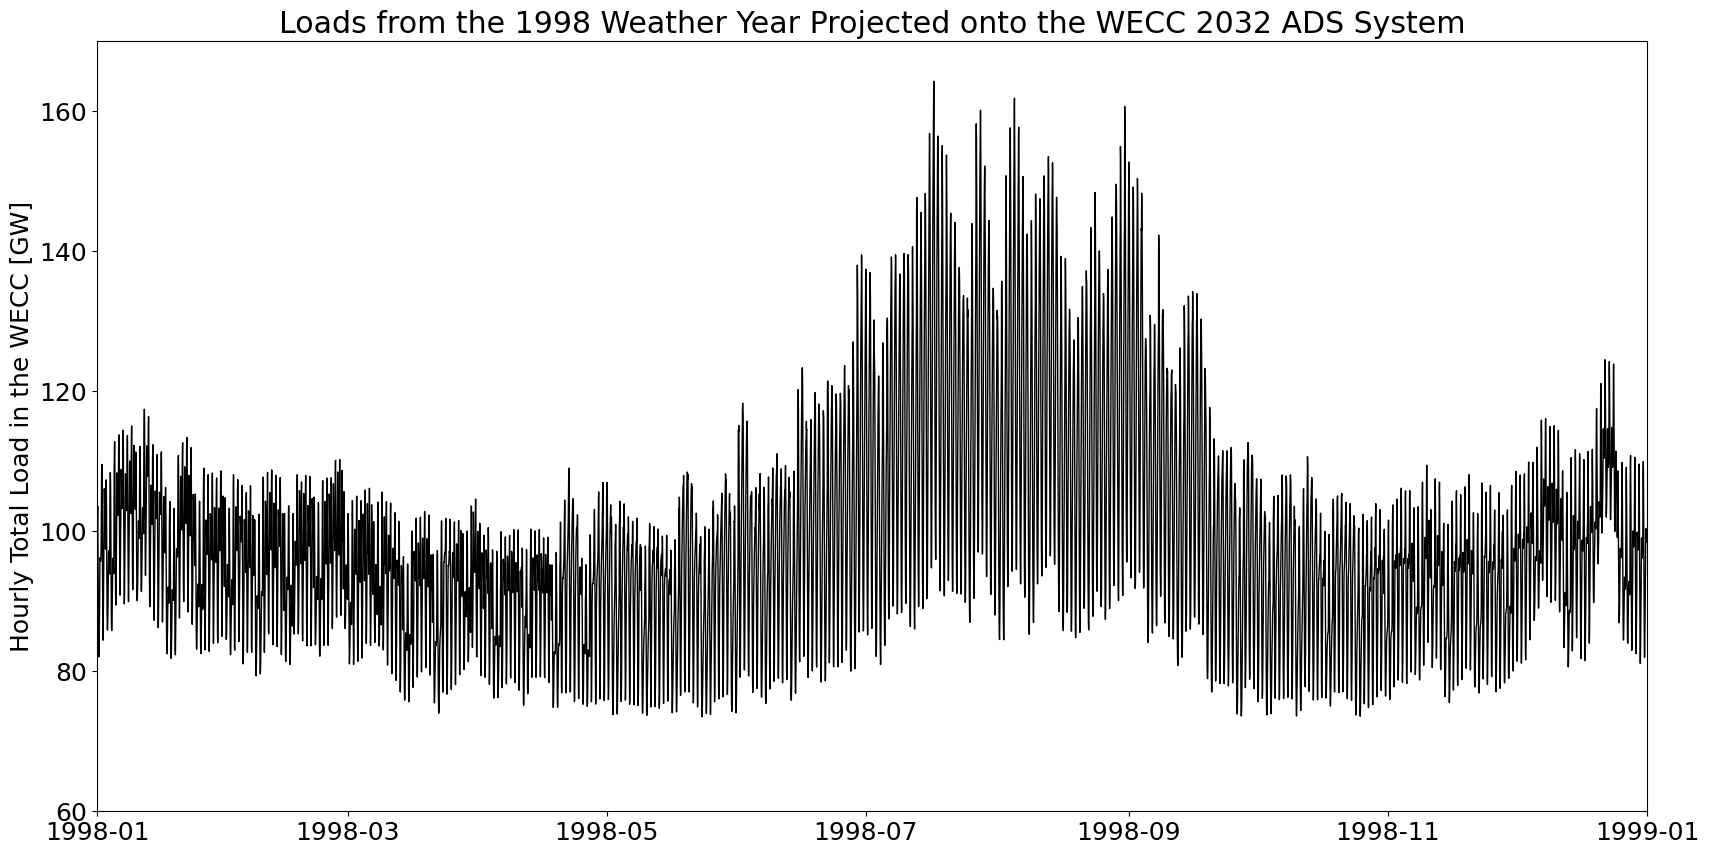

In [66]:
# Make the plot
output_df = plot_load_time_series(year = '1998', 
                                  load_data_dir = load_data_dir,
                                  image_output_dir = image_output_dir, 
                                  image_resolution = 150, 
                                  save_images = True)

output_df
